# **ECG Heartbeat Categorization**
# Introduction
In recent years, the purpose and usage of deep learning methodologies, specifically within the healthcare sector has witnessed great impact, revolutionizing various aspects of medical diagnostics and treatment.  Specifically, the application of deep learning techniques in ECG (Electrocardiogram) heartbeat classification has gathered significant attention mainly because of its potential to improve its accuracy and efficiency of cardiac anomaly detection.

In this project, let us aim to use deep learning methods to make a model that deals with and sorts ECG heartbeats into different groups accurately. We'll follow a step-by-step process, including looking closely at the data, fixing any issues with it, building the model, checking how well it works, and understanding the results. The First step, is carefully studying the dataset to understand the details and patterns in the ECG signals. Proceeding with the clean-up of the data, making sure it's organized properly and doesn't have any mistakes that could affect the model. The key to success here is creating deep learning systems that can learn from the complex features of ECG signals. Let's train and test the models cautiously and thoroughly to make sure they work well.


In [ ]:
%matplotlib inline

*   Installing Python package named "torchsummary" using the pip package manager. It allows to gain insights into the architecture of ECG heartbeat classification models. This understanding is essential as it helps in debugging, optimizing, and fine-tuning the models for improved accuracy and efficiency.
*   This is chosen because, unlike some other libraries, it is specialized in providing model summaries, and it's lightweight and focuses on providing concise model summaries without unnecessary complexities.


In [ ]:
!pip install torchsummary  # Using the pip package manager to install the 'torchsummary' package.

#Exploratory Data Analysis (EDA):

Performing and executing exploratory data analysis (EDA)  is important in understanding the dataset's behavioural actions and characteristics such as data distribution and class imbalances.

Setting a random seed is done to ensure the reproducibility of random processes which guarantees that the same sequence of random numbers will be generated each and every time while running the code, this leads to consistent results across different executions.

In [ ]:
random_seed = 1024  # Set a fixed value (1024) as the seed for random number generation.
import numpy as np  # Import the numpy library and alias it as 'np'.
np.random.seed(random_seed)  # Set the seed for numpy's random number generator to ensure reproducibility.
import random  # Import the random module from Python's standard library.
random.seed(random_seed)  # Set the seed for Python's random number generator to ensure reproducibility.


Using Pandas for data manipulation and analysis purposes and, commonly used for handling data formats like CSV files. Using Matplotlib to visualize ECG heartbeat waveforms, distribution of classes, and loss curves during model training. Scikit-learn is used for tasks like data preprocessing, model training, evaluation, and performance metrics calculation.

In [ ]:
import pandas as pd  # Import the pandas library.
import matplotlib.pyplot as plt  # Import the matplotlib library for data visualization.
from sklearn.utils import resample  # Import the resample function from scikit-learn for data resampling.
import sklearn as skl  # Import scikit-learn library for machine learning.
import sklearn.linear_model as linear_model  # Import linear models from scikit-learn for optimization algorithms.
import sklearn.neural_network as neural_network  # Import neural network layers from scikit-learn.
import sklearn.preprocessing as preprocessing  # Import preprocessing functions from scikit-learn.
from sklearn.model_selection import train_test_split  # Import train_test_split function from scikit-learn for data splitting.


In [ ]:
import torch  # Import the PyTorch library for deep learning.
import torch.optim as optim  # Import the optim module from PyTorch for optimization algorithms.
import torch.nn as nn  # Import the nn module from PyTorch for building neural network layers.
import torch.nn.functional as F  # Import the functional interface of PyTorch's nn module for activation functions.
from torch.utils.data.sampler import SubsetRandomSampler  # Import the SubsetRandomSampler class from PyTorch for data sampling.
from torchsummary import summary  # Import the summary function from torchsummary for summarizing PyTorch models.

In [ ]:
plt.style.use('dark_background') # Set the plotting style to 'dark_background' to change the appearance of plots to have a black background.



 # Model Design and Data Preprocessing:

 Designing essential models and pre-processing the data are the main two important steps to ensure effective training and model performance.

*   Model Architectures:
Two convolutional neural network (CNN) architectures, namely Net1 and Net2, are created and assigned for the task of heartbeat categorization. This architectural layer consists of max-pooling layers, and fully-connected layers, specialized to extract features from the input data.

*   Data Pre-processing:
Data pre-processing techniques like data augmentation are used to enhance and improve the model's robustness and generalization. Gaussian noise and amplification or stretching are the two versions of data augmentations that are sued and applied to the input of heartbeat signals.

"ECG Heartbeat Categorization" project is used to load the ECG heartbeat dataset from a CSV file stored in Google Drive into a Pandas DataFrame for further analysis and modeling.

 Datasets used:
*   mitbih_test.csv
*   mitbih_train.csv



In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive') # Mount Google Drive

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/mitbih_test.csv")# Load the dataset from Google Drive

Mounted at /content/drive


In [ ]:
import os
for dirname, _, filenames in os.walk("/content/drive/My Drive/Colab Notebooks/mitbih_test.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
mitbih_train_loc = "/content/drive/My Drive/Colab Notebooks/mitbih_train.csv" # Defining file paths
mitbih_test_loc = "/content/drive/My Drive/Colab Notebooks/mitbih_test.csv" # Defining file paths


In [ ]:
mitbih_train_df = pd.read_csv(mitbih_train_loc, header=None) #reading datasets from files
mitbih_test_df = pd.read_csv(mitbih_test_loc, header=None)#reading datasets from files

In [ ]:
dataset = pd.concat([mitbih_train_df, mitbih_test_df], axis=0, sort=True).reset_index(drop=True)

**Dataset Characteristics:**



*   Data Imbalance:
The dataset contains multiple classes of heartbeats, including Normal Beat (N), Supraventricular Premature or Ectopic Beat (S), Premature Ventricular Contraction (V), Fusion of Ventricular and Normal Beat (F), and Unclassified Beat (Q).  The pie chart illustrates the percentage breakdown of heartbeat types, indicating potential class imbalances.

*   Data Visualization:
It generates visualizations to clearly understand and explain the characteristics of different heartbeat types. For displaying waveforms, the subplots are created and displayed for the each heartbeat category correspondingly.

Setting labels to display labels in human-readable information about the type of heartbeat observed, aiding in understanding and interpreting the dataset. The extracted observations serve as  input features for training machine learning models. This approach enhances the interpretability, efficiency, and compatibility of the dataset, contributing to its effectiveness.

In [ ]:
labels = dataset.iloc[:, -1].astype('category').map({
    0: 'N - Normal Beat',
    1: 'S - Supraventricular premature or ectopic beat',
    2: 'V - Premature ventricular contraction',
    3: 'F - Fusion of ventricular and normal beat',
    4: 'Q - Unclassified beat'})

# since the last column is the category
obs = np.array(dataset.iloc[:, :187])

In [ ]:
print("First 5 rows of mitbih_train_df:")
print(mitbih_train_df.head(5))

First 5 rows of mitbih_train_df:
        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0 

In [ ]:
print("\nFirst 5 rows of mitbih_test_df:")
print(mitbih_test_df.head(5))


First 5 rows of mitbih_test_df:
        0         1         2         3         4         5         6    \
0  1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1  0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2  0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3  1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4  0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.080537  0.070470  0.090604  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0 

# Presentation of Findings with Visualizations:
By setting indexes, it retrieves the observations corresponding to each heartbeat category label.

It facilitates visual inspection of the ECG waveforms for different heartbeat categories.

By selecting representative samples from each class, the visualization helps in summarising the characteristics of the entire dataset which provides clear ideas and insights into the distribution and structure of different heartbeat categories.


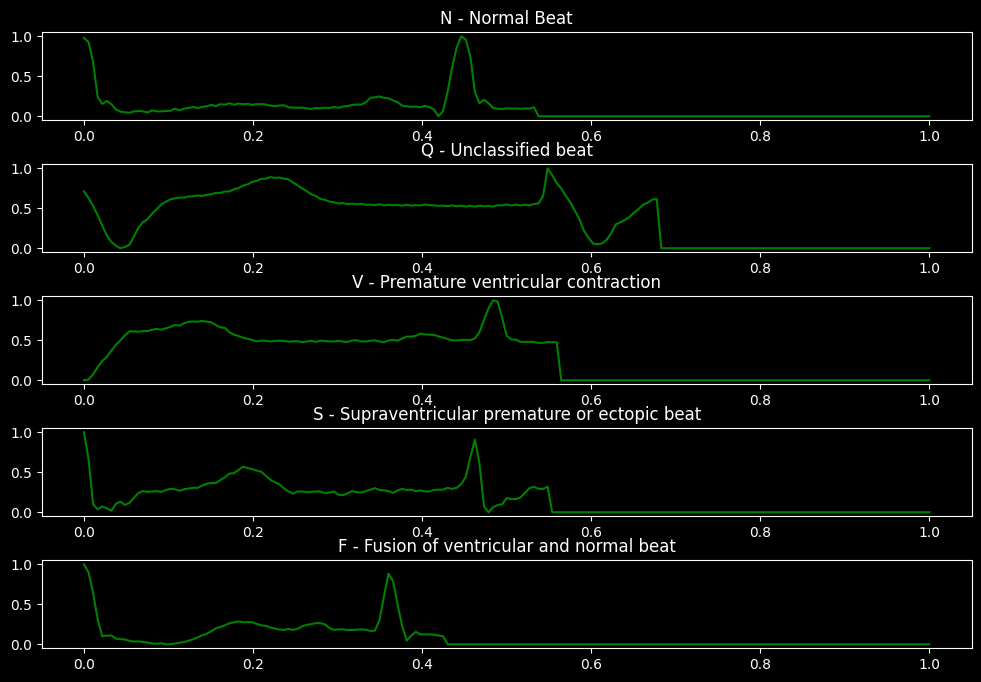

In [ ]:
n_indexes = labels.index[labels == 'N - Normal Beat']  # Get the indexes of all labels
q_indexes = labels.index[labels == 'Q - Unclassified beat']
v_indexes = labels.index[labels == 'V - Premature ventricular contraction']
s_indexes = labels.index[labels == 'S - Supraventricular premature or ectopic beat']
f_indexes = labels.index[labels == 'F - Fusion of ventricular and normal beat']

n_index = n_indexes[0]  # Sample one observation per class by indexing the train_labels
q_index = q_indexes[0]
v_index = v_indexes[0]
s_index = s_indexes[0]
f_index = f_indexes[0]

def generate_subplot(figure, obs, gridspec, row, col, title):
    axis = figure.add_subplot(gridspec[row, col])
    axis.plot(np.linspace(0, 1, 187), obs, color='green')  # setting the color to green
    axis.set_title(title)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.001)
gs = fig.add_gridspec(5, 1)

# Generating subplots for each label category
generate_subplot(fig, obs[n_index], gs, 0, 0, 'N - Normal Beat')  # For N - Normal Beat
generate_subplot(fig, obs[q_index], gs, 1, 0, 'Q - Unclassified beat')  # For Q - Unclassified beat
generate_subplot(fig, obs[v_index], gs, 2, 0, 'V - Premature ventricular contraction')  # For V - Premature ventricular contraction
generate_subplot(fig, obs[s_index], gs, 3, 0, 'S - Supraventricular premature or ectopic beat')  # For S - Supraventricular premature or ectopic beat
generate_subplot(fig, obs[f_index], gs, 4, 0, 'F - Fusion of ventricular and normal beat')  # F - Fusion of ventricular and normal beat

plt.show()


The observation counts provide insights into the distribution and prevalence of different heartbeat types, helping to understand the class balance or class imbalance in the dataset. The counts serve as input for creating informative visualizations, which we have used to show in the form of pie chart. This pie chart effectively communicates the relative proportions of different heartbeat categories in the dataset. The reason to choose a pie chart is simple and clear, it is accessible to a wide audience and requires minimal effort to interpret, making them suitable for communicating key insights to stakeholders with varying levels of technical expertise.

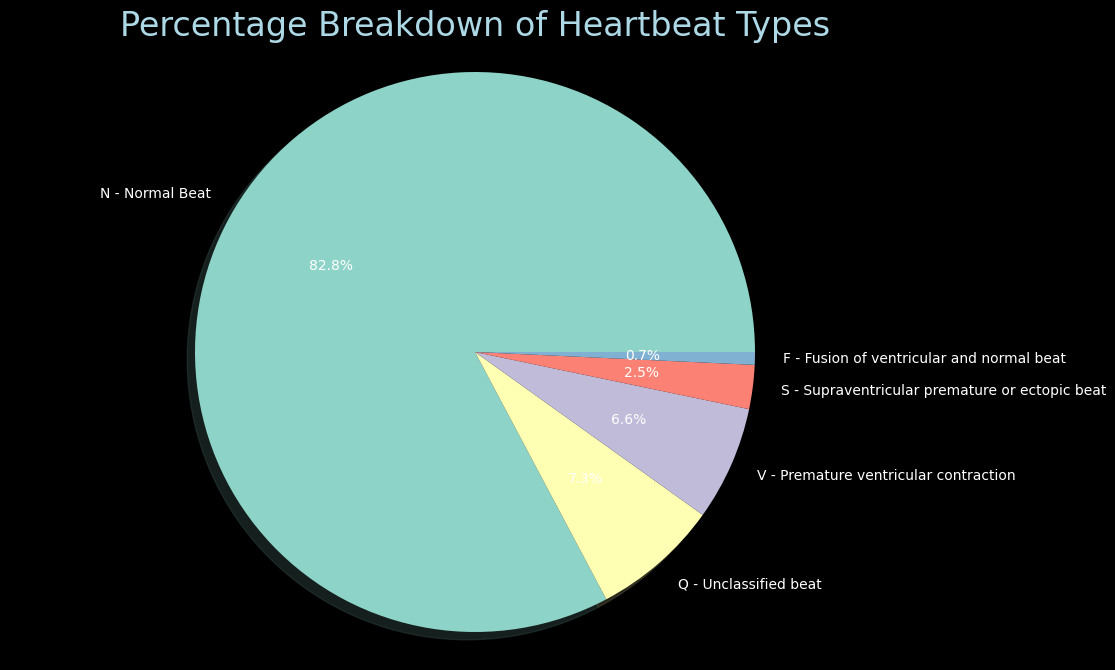

In [ ]:

observation_counts = labels.value_counts()  # Counting the occurrences of each label
labels_descending = observation_counts.index.tolist()  # Converting the index of the counts


plt.figure(figsize=(12, 8)) # Plot the pie chart with specified labels, autopct formatting, starting angle, and shadow effect
plt.pie(observation_counts, labels=labels_descending, autopct='%1.1f%%', startangle=0, shadow=True) # Set the figure size and other necessary things
plt.axis('equal') # Setting equal aspect ratio to be in circle

plt.title("Percentage Breakdown of Heartbeat Types", fontsize=24, color='lightblue', fontfamily='sans-serif') # Setting the title with specified fontsize, color, and font family
plt.show() # Show the plot


In [ ]:
print(observation_counts)

187
N - Normal Beat                                   90589
Q - Unclassified beat                              8039
V - Premature ventricular contraction              7236
S - Supraventricular premature or ectopic beat     2779
F - Fusion of ventricular and normal beat           803
Name: count, dtype: int64


Here, the resample function is used to address the class imbalance by randomly oversampling or undersampling instances from each class to achieve a more balanced distribution. It provides a convenient and efficient way to handle class imbalance, which is a common challenge in machine learning tasks. By aggregating resampled data from all classes, it creates a balanced dataset ready for further preprocessing and model training. The resample function offers flexibility in sampling strategies and parameters, allowing users to tailor the resampling process to their specific needs and preferences.

In [ ]:
from sklearn.utils import resample

# Resample indexes of each class
n_indexes_resampled = resample(n_indexes, replace=True, n_samples=10000, random_state=random_seed)
q_indexes_resampled = resample(q_indexes, replace=True, n_samples=10000, random_state=random_seed)
v_indexes_resampled = resample(v_indexes, replace=True, n_samples=10000, random_state=random_seed)
s_indexes_resampled = resample(s_indexes, replace=True, n_samples=10000, random_state=random_seed)
f_indexes_resampled = resample(f_indexes, replace=True, n_samples=10000, random_state=random_seed)

# Initialize the labels_resampled to an empty Pandas Series
labels_resampled = pd.Series([])
obs_resampled = None

# Add all indexes_resampled for all classes to iterate
label_indexes_list = [n_indexes_resampled,
                      q_indexes_resampled,
                      v_indexes_resampled,
                      s_indexes_resampled,
                      f_indexes_resampled]

for label_indexes in label_indexes_list:
    # Append labels for all resampled classes
    labels_resampled = pd.concat([labels_resampled, labels[label_indexes]], ignore_index=True)

    # Append observations for all resampled classes
    if obs_resampled is None:
        obs_resampled = obs[label_indexes]
    else:
        obs_resampled = np.concatenate((obs_resampled, obs[label_indexes]))


The counts provide clear-cut details into the distribution of classes after addressing class imbalance through resampling. It helps assess the effectiveness of the resampling process in achieving class balance and mitigating the effects of class imbalance. This approach is chosen for its effectiveness in conveying class distribution information in a visually appealing and interpretable manner, enhancing understanding and decision-making in the project.

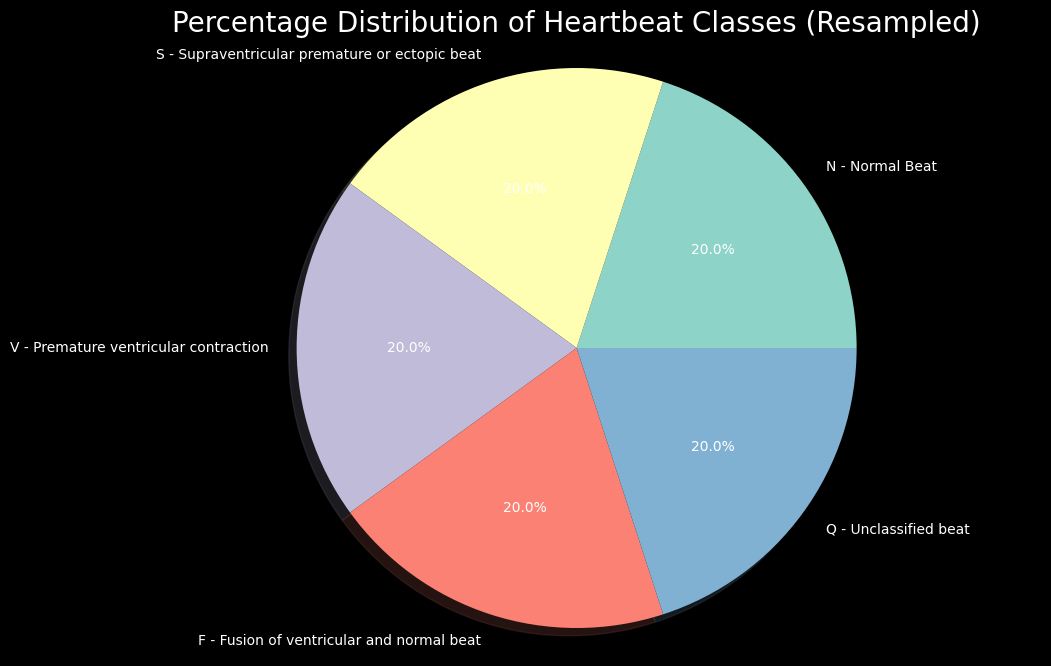

In [ ]:
observation_counts = labels_resampled.value_counts()
labels_descending = np.array(observation_counts.keys())

fig1, ax1 = plt.subplots()
ax1.pie(observation_counts, labels=labels_descending, autopct='%1.1f%%', startangle=0, shadow=True)
ax1.axis('equal')
fig1.set_size_inches(12,8)
ax1.set_title("Percentage Distribution of Heartbeat Classes (Resampled)", fontsize=20)
plt.show()

In [ ]:
print(observation_counts)

N - Normal Beat                                   10000
S - Supraventricular premature or ectopic beat    10000
V - Premature ventricular contraction             10000
F - Fusion of ventricular and normal beat         10000
Q - Unclassified beat                             10000
Name: count, dtype: int64


Gaussian noise is a common type of random variation used for data augmentation, which can help improve the robustness and generalization of machine learning models, it provides a simple and straightforward way to augment the dataset without significantly altering the characteristics of the original observations. Stretching and amplification introduce variations in the length and magnitude of the ECG signals, respectively, mimicking potential distortions or anomalies in real-world recordings. By combining multiple types of noise, this method offers greater flexibility in generating diverse and realistic synthetic data for training machine learning models. Scipy offers a comprehensive set of signal processing tools, making it suitable for implementing advanced noise generation techniques like stretching.

In [ ]:
from scipy.signal import resample

# first version of adding random noise (Gaussian Noise)
mean = 0
std = 0.05
def add_gaussian_noise(signal):
    noise=np.random.normal(mean, std, 187)
    return (signal + noise)

obs_resampled_with_noise_1 = np.array([add_gaussian_noise(obs) for obs in  obs_resampled])

# second version of adding random noise (Amplify and Stretch)
def stretch(x):
    l = int(187 * (1 + (random.random()-0.5)/3))
    y = resample(x, l)
    if l < 187:
        y_ = np.zeros(shape=(187, ))
        y_[:l] = y
    else:
        y_ = y[:187]
    return y_

def amplify(x):
    alpha = (random.random()-0.5)
    factor = -alpha*x + (1+alpha)
    return x*factor

def add_amplify_and_stretch_noise(x):
    result = np.zeros(shape=187)
    if random.random() < 0.33:
        new_y = stretch(x)
    elif random.random() < 0.66:
        new_y = amplify(x)
    else:
        new_y = stretch(x)
        new_y = amplify(new_y)
    return new_y

obs_resampled_with_noise_2 = np.array([add_amplify_and_stretch_noise(obs) for obs in  obs_resampled])

Subplots enable a comparative analysis of the effects of different data augmentation techniques on ECG waveforms across different classes. The comparative visualization enables a comprehensive assessment of the quality and appropriateness of different augmentation techniques for each class. Comparing different augmentation techniques side by side allows for a qualitative evaluation of their effectiveness in preserving or enhancing the features of original ECG waveforms.


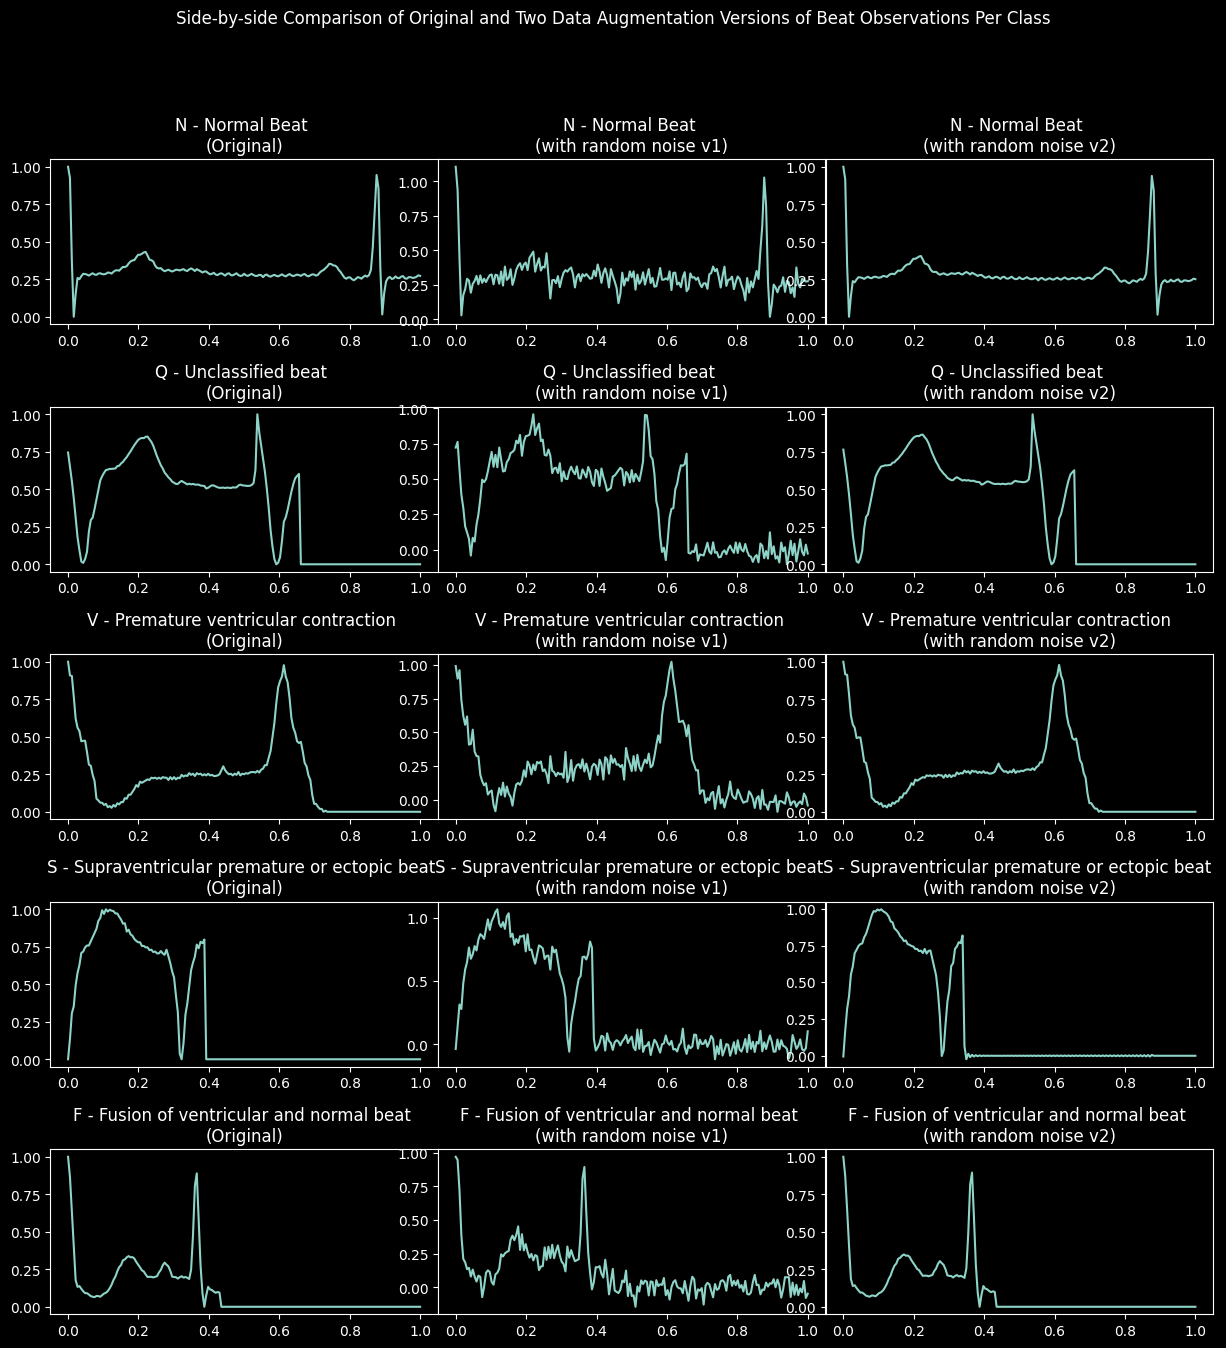

In [ ]:
def generate_subplot(figure, obs, gridspec, row, col, title):
    axis = figure.add_subplot(gridspec[row, col])
    axis.plot(np.linspace(0, 1, 187), obs)
    axis.set_title(title)

def generate_plots_for_a_specific_data_augmentation(obs_resampled, obs_resampled_with_noise_1, obs_resampled_with_noise_2):
    # sample one observation per class by indexing the train_labels
    n_index = 0
    q_index = 10000
    v_index = 20000
    s_index = 30000
    f_index = 40000

    fig = plt.figure(figsize=(15, 15))
    fig.subplots_adjust(hspace = .5, wspace=.001)
    gs = fig.add_gridspec(5, 3)

    # for N - Normal Beat
    generate_subplot(fig, obs_resampled[n_index], gs, 0, 0, 'N - Normal Beat \n(Original)')
    generate_subplot(fig, obs_resampled_with_noise_1[n_index], gs, 0, 1, 'N - Normal Beat \n(with random noise v1)')
    generate_subplot(fig, obs_resampled_with_noise_2[n_index], gs, 0, 2, 'N - Normal Beat \n(with random noise v2)')

    # for Q - Unclassified beat
    generate_subplot(fig, obs_resampled[q_index], gs, 1, 0, 'Q - Unclassified beat \n(Original)')
    generate_subplot(fig, obs_resampled_with_noise_1[q_index], gs, 1, 1, 'Q - Unclassified beat \n(with random noise v1)')
    generate_subplot(fig, obs_resampled_with_noise_2[q_index], gs, 1, 2, 'Q - Unclassified beat \n(with random noise v2)')

    # for V - Premature ventricular contraction
    generate_subplot(fig, obs_resampled[v_index], gs, 2, 0, 'V - Premature ventricular contraction \n(Original)')
    generate_subplot(fig, obs_resampled_with_noise_1[v_index], gs, 2, 1, 'V - Premature ventricular contraction \n(with random noise v1)')
    generate_subplot(fig, obs_resampled_with_noise_2[v_index], gs, 2, 2, 'V - Premature ventricular contraction \n(with random noise v2)')

    # for S - Supraventricular premature or ectopic beat
    generate_subplot(fig, obs_resampled[s_index], gs, 3, 0, 'S - Supraventricular premature or ectopic beat \n(Original)')
    generate_subplot(fig, obs_resampled_with_noise_1[s_index], gs, 3, 1, 'S - Supraventricular premature or ectopic beat \n(with random noise v1)')
    generate_subplot(fig, obs_resampled_with_noise_2[s_index], gs, 3, 2, 'S - Supraventricular premature or ectopic beat \n(with random noise v2)')

    # F - Fusion of ventricular and normal beat
    generate_subplot(fig, obs_resampled[f_index], gs, 4, 0, 'F - Fusion of ventricular and normal beat \n(Original)')
    generate_subplot(fig, obs_resampled_with_noise_1[f_index], gs, 4, 1, 'F - Fusion of ventricular and normal beat \n(with random noise v1)')
    generate_subplot(fig, obs_resampled_with_noise_2[f_index], gs, 4, 2, 'F - Fusion of ventricular and normal beat \n(with random noise v2)')

    plt.suptitle('Side-by-side Comparison of Original and Two Data Augmentation Versions of Beat Observations Per Class')
    plt.show()

generate_plots_for_a_specific_data_augmentation(obs_resampled, obs_resampled_with_noise_1, obs_resampled_with_noise_2)

The dataset split ensures that the model is trained on a portion of the data, validated on another portion to fine-tune hyperparameters, and tested on a separate portion to assess its generalization performance. It enables the estimation of the model's performance metrics, such as accuracy, precision, recall, and F1-score, on independent datasets, providing a more accurate assessment of its real-world performance. Randomization prevents any bias or patterns in the data distribution from affecting the performance evaluation of the model. Fine-tuning the proportions of training, validation, and testing data enables optimization of model performance and resource utilization, leading to more efficient and effective machine learning workflows.

In [ ]:
# number of subprocesses to use for data loading
num_workers = 0
# percentage of training set to use for testing and validation
test_valid_size = 0.2
# percentage of test/valid set to use for testing and validation from the test_valid_idx (to be called test_size)
test_size = 0.5


# obtain training indices that will be used for validation
num_train = len(obs_resampled)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_valid_size * num_train))
train_idx, test_valid_idx = indices[split:], indices[:split]

# split test_valid_idx to test_idx and valid_idx
num_test_valid = len(test_valid_idx)
test_valid_split = int(num_test_valid * test_size)
test_idx, valid_idx = test_valid_idx[:test_valid_split], test_valid_idx[test_valid_split:]

DataLoader objects handle data loading, shuffling, and batching, making it easier to iterate over the dataset in mini-batches and feed it into the model. DataLoader's built-in functionalities, such as shuffling and batching, simplify data preprocessing and enhance the training process's stability and effectiveness. Parameter customization facilitates experimentation with different batch sizes and data augmentation techniques, leading to improved model performance and convergence. Data augmentation enhances model generalization and robustness by introducing variations in the training data, thereby reducing overfitting and improving performance on unseen data.

In [ ]:
# Batch Size of 32
batch_size = 32

def convert_to_loader(X, y, batch_size):
    data = []
    for i in range(len(X)):
        data.append([X[i], y[i]])

    # drop last since it causes problems on the validation dataset
    loader = torch.utils.data.DataLoader(data, shuffle=True, batch_size=batch_size, num_workers=0, drop_last=True)

    return loader

# convert labels_resampled to its integer encoding of the following listing:
#     0: 'N - Normal Beat'
#     1: 'S - Supraventricular premature or ectopic beat'
#     2: 'V - Premature ventricular contraction'
#     3: 'F - Fusion of ventricular and normal beat'
#     4: 'Q - Unclassified beat
labels_resampled_factorized = pd.factorize(labels_resampled.astype('category'))[0]


# now we create separate data loaders for both datasets with different data augmentation. Models will be trained for each

# for data augmentation v1 (Add Gaussian Noise)
train_loader_1 = convert_to_loader(obs_resampled_with_noise_1[train_idx],
                                 labels_resampled_factorized[train_idx],
                                 batch_size)
valid_loader_1 = convert_to_loader(obs_resampled_with_noise_1[valid_idx],
                                 labels_resampled_factorized[valid_idx],
                                 batch_size)
test_loader_1 = convert_to_loader(obs_resampled_with_noise_1[test_idx],
                                 labels_resampled_factorized[test_idx],
                                 batch_size)

# for data augmentation v2 (Amplify and Stretch)
train_loader_2 = convert_to_loader(obs_resampled_with_noise_2[train_idx],
                                 labels_resampled_factorized[train_idx],
                                 batch_size)
valid_loader_2 = convert_to_loader(obs_resampled_with_noise_2[valid_idx],
                                 labels_resampled_factorized[valid_idx],
                                 batch_size)
test_loader_2 = convert_to_loader(obs_resampled_with_noise_2[test_idx],
                                 labels_resampled_factorized[test_idx],
                                 batch_size)

The convolutional layers in the network are designed to extract relevant features from the input ECG signals, capturing patterns indicative of different heartbeat categories. The network consists of multiple convolutional layers followed by ReLU activation functions, which help capture hierarchical features from the input ECG signals.

In [ ]:
# define the 1st architecture
class Net1(nn.Module):
    def __init__(self, input_features, output_dim):
        super(Net1, self).__init__()
        # 1-dimensional convolutional layer
        self.conv0 = nn.Conv1d(input_features, 32, output_dim, stride=1, padding=0)
        self.conv1 = nn.Conv1d(32, 32, output_dim, stride=1, padding=2)
        self.conv2 = nn.Conv1d(32, 128, output_dim, stride=1, padding=2)

        # max pooling layer
        self.pool1 = nn.MaxPool1d(5, 2)

        # fully-connected layer
        self.fc1 = nn.Linear(256, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_dim)

        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers

        inp = x.view(32, -1, 187)
        C = self.conv0(inp)

        # first conv layer
        C11 = self.conv0(inp)
        A11 = F.relu(C11)
        C12 = self.conv1(A11)
        S11 = torch.add(C12, C)
        A12 = F.relu(S11)
        M11 = self.pool1(A12)

        # second conv layer
        C21 = self.conv1(M11)
        A21 = F.relu(C21)
        C22 = self.conv1(A21)
        S21 = torch.add(C22, M11)
        A22 = F.relu(S21)
        M21 = self.pool1(A22)

        # third conv layer
        C31 = self.conv1(M21)
        A31 = F.relu(C31)
        C32 = self.conv1(A31)
        S31 = torch.add(C32, M21)
        A32 = F.relu(S31)
        M31 = self.pool1(A32)

        # fourth conv layer
        C41 = self.conv1(M31)
        A41 = F.relu(C41)
        C42 = self.conv1(A41)
        S41 = torch.add(C42, M31)
        A42 = F.relu(S41)
        M41 = self.pool1(A42)

        # flatten the output of the last layer
        F1 = M41.view(32, -1)

        D1 = self.fc1(F1)
        A6 = F.relu(D1)
        D2 = self.fc2(A6)
        D3 = self.fc3(A6)

#         return D3
        return self.softmax(D3)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model1 = Net1(input_features=2, output_dim=5).to(device)

# check keras-like model summary using torchsummary

summary(model1, (32, 187))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 32, 183]             352
            Conv1d-2              [-1, 32, 183]             352
            Conv1d-3              [-1, 32, 183]           5,152
         MaxPool1d-4               [-1, 32, 90]               0
            Conv1d-5               [-1, 32, 90]           5,152
            Conv1d-6               [-1, 32, 90]           5,152
         MaxPool1d-7               [-1, 32, 43]               0
            Conv1d-8               [-1, 32, 43]           5,152
            Conv1d-9               [-1, 32, 43]           5,152
        MaxPool1d-10               [-1, 32, 20]               0
           Conv1d-11               [-1, 32, 20]           5,152
           Conv1d-12               [-1, 32, 20]           5,152
        MaxPool1d-13                [-1, 32, 8]               0
           Linear-14                   

In [ ]:
# define the 1st architecture (from the paper)
class Net2(nn.Module):
    def __init__(self, input_features, output_dim):
        super(Net2, self).__init__()
        # 1-dimensional convolutional layer
        self.conv0 = nn.Conv1d(input_features, 128, output_dim, stride=1, padding=0)
        self.conv1 = nn.Conv1d(128, 128, output_dim, stride=1, padding=2)

        # max pooling layer
        self.pool1 = nn.MaxPool1d(5, 2)

        # fully-connected layer
        self.fc1 = nn.Linear(256, 32)
        self.fc2 = nn.Linear(32, output_dim)

        # softmax output
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers

        inp = x.view(32, -1, 187)
        C = self.conv0(inp)

        # first conv layer
        C11 = self.conv0(inp)
        A11 = F.relu(C11)
        C12 = self.conv1(A11)
        S11 = torch.add(C12, C)
        M11 = self.pool1(S11)

        # second conv layer
        C21 = self.conv1(M11)
        A21 = F.relu(C21)
        C22 = self.conv1(A21)
        S21 = torch.add(C22, M11)
        M21 = self.pool1(S21)

        # third conv layer
        C31 = self.conv1(M21)
        A31 = F.relu(C31)
        C32 = self.conv1(A31)
        S31 = torch.add(C32, M21)
        M31 = self.pool1(S31)

        # fourth conv layer
        C41 = self.conv1(M31)
        A41 = F.relu(C41)
        C42 = self.conv1(A41)
        S41 = torch.add(C42, M31)
        M41 = self.pool1(S41)

        # last layer
        C51 = self.conv1(M41)
        A51 = F.relu(C51)
        C52 = self.conv1(A51)
        S51 = torch.add(C52, M41)
        M51 = self.pool1(S51)

        # flatten the output of the last layer
        F1 = M51.view(32, -1)

        D1 = self.fc1(F1)
        A6 = F.relu(D1)
        D2 = self.fc2(A6)

        return self.softmax(D2)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model2 = Net2(input_features=2, output_dim=5).to(device)

# check keras-like model summary using torchsummary
from torchsummary import summary
summary(model2, (32, 187))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 128, 183]           1,408
            Conv1d-2             [-1, 128, 183]           1,408
            Conv1d-3             [-1, 128, 183]          82,048
         MaxPool1d-4              [-1, 128, 90]               0
            Conv1d-5              [-1, 128, 90]          82,048
            Conv1d-6              [-1, 128, 90]          82,048
         MaxPool1d-7              [-1, 128, 43]               0
            Conv1d-8              [-1, 128, 43]          82,048
            Conv1d-9              [-1, 128, 43]          82,048
        MaxPool1d-10              [-1, 128, 20]               0
           Conv1d-11              [-1, 128, 20]          82,048
           Conv1d-12              [-1, 128, 20]          82,048
        MaxPool1d-13               [-1, 128, 8]               0
           Conv1d-14               [-1,

# Building, Training, and Validation

*   Model Training:
Models are trained using custom data loaders, where the training data is fed in batches to the models. Forward and backward passes are the training process used and optimization is also done to update the model parameters.

*   Model Validation:
Validation sets are used to evaluate the model's performance during the training process. Validation loss is observed and the models with low validation losses are preserved for further evaluation.  

Training the machine learning model using a custom dataset loaded via data loaders (train_loader and valid_loader). It includes a validation step to evaluate the model's performance on a separate validation dataset that is 'valid_loader'. The GPU acceleration can significantly speed up the training process, especially when dealing with large datasets and complex models.

In [ ]:
def train_by_model_and_custom_loader(model, train_loader, valid_loader, criterion, optimizer, best_model_name, n_epochs, train_on_gpu):
    model = model.float()
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        model.cuda()
    valid_loss_min = np.Inf # track change in validation loss
    valid_losses = []

    for epoch in range(1, n_epochs+1):

        # keep track of training and validation loss
        train_loss = 0.0
        valid_loss = 0.0

        ###################
        # train the model #
        ###################
        model.train()
        for data, target in train_loader:
            # move tensors to GPU if CUDA is available
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data.float())

            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item()*data.size(0)

        ######################
        # validate the model #
        ######################
        model.eval()
        for data, target in valid_loader:
            # move tensors to GPU if CUDA is available
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data.float())
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss
            valid_loss += loss.item()*data.size(0)

        # calculate average losses
        train_loss = train_loss/len(train_loader.dataset)
        valid_loss = valid_loss/len(valid_loader.dataset)

        valid_losses.append(valid_loss)

        # print training/validation statistics
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, train_loss, valid_loss))

        # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), best_model_name)
            valid_loss_min = valid_loss

    return valid_losses

In [ ]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

# number of epochs
num_epochs = 25

CUDA is not available.  Training on CPU ...


# Hyperparameter Tuning:

Hyperparameter tuning involves adjusting the parameters as required such as learning rate, batch size, number of epochs, and many more. Hyperparameters can sometimes be adjusted dynamically during training based on certain conditions or performance metrics.

In [ ]:
def train_by_model_and_custom_loader(model, train_loader, valid_loader, criterion, optimizer, best_model_name, n_epochs, train_on_gpu):
    model = model.float()
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        model.cuda()
    valid_loss_min = np.Inf # track change in validation loss
    valid_losses = []

    for epoch in range(1, n_epochs+1):

        # keep track of training and validation loss
        train_loss = 0.0
        valid_loss = 0.0

        ###################
        # train the model #
        ###################
        model.train()
        for data, target in train_loader:
            # move tensors to GPU if CUDA is available
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data.float())

            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item()*data.size(0)

        ######################
        # validate the model #
        ######################
        model.eval()
        for data, target in valid_loader:
            # move tensors to GPU if CUDA is available
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data.float())
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss
            valid_loss += loss.item()*data.size(0)

        # calculate average losses
        train_loss = train_loss/len(train_loader.dataset)
        valid_loss = valid_loss/len(valid_loader.dataset)

        valid_losses.append(valid_loss)

        # print training/validation statistics
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, train_loss, valid_loss))

        # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), best_model_name)
            valid_loss_min = valid_loss

    return valid_losses

The learning rate is important which helps us to find the step size at which the model weights are updated during the optimization process. Batch size informs the number of data samples processed before updating the model parameters. The number of epochs defines the number of times the entire dataset is passed through the model during training.

In [ ]:
# create a complete CNN
model_1 = Net1(input_features=1, output_dim=5)
# specify loss function
criterion = nn.NLLLoss()

# specify optimizer
optimizer = optim.Adam(model_1.parameters(), lr=0.001)
model_1_validation_losses = train_by_model_and_custom_loader(model_1, train_loader_1, valid_loader_1, criterion, optimizer, 'model_ecg_heartbeat_categorization_1.pt', num_epochs, train_on_gpu)

Epoch: 1 	Training Loss: 0.634516 	Validation Loss: 0.475277
Validation loss decreased (inf --> 0.475277).  Saving model ...
Epoch: 2 	Training Loss: 0.393106 	Validation Loss: 0.342648
Validation loss decreased (0.475277 --> 0.342648).  Saving model ...
Epoch: 3 	Training Loss: 0.317574 	Validation Loss: 0.278185
Validation loss decreased (0.342648 --> 0.278185).  Saving model ...
Epoch: 4 	Training Loss: 0.277145 	Validation Loss: 0.272603
Validation loss decreased (0.278185 --> 0.272603).  Saving model ...
Epoch: 5 	Training Loss: 0.249083 	Validation Loss: 0.234480
Validation loss decreased (0.272603 --> 0.234480).  Saving model ...
Epoch: 6 	Training Loss: 0.221606 	Validation Loss: 0.218047
Validation loss decreased (0.234480 --> 0.218047).  Saving model ...
Epoch: 7 	Training Loss: 0.207638 	Validation Loss: 0.191905
Validation loss decreased (0.218047 --> 0.191905).  Saving model ...
Epoch: 8 	Training Loss: 0.193983 	Validation Loss: 0.183726
Validation loss decreased (0.19190

In [ ]:
# create a complete CNN
model_2 = Net1(input_features=1, output_dim=5)
# specify loss function
criterion = nn.NLLLoss()

# specify optimizer
optimizer = optim.Adam(model_2.parameters(), lr=0.001)
model_2_validation_losses = train_by_model_and_custom_loader(model_2, train_loader_2, valid_loader_2, criterion, optimizer, 'model_ecg_heartbeat_categorization_2.pt', num_epochs, train_on_gpu)

Epoch: 1 	Training Loss: 0.654305 	Validation Loss: 0.444333
Validation loss decreased (inf --> 0.444333).  Saving model ...
Epoch: 2 	Training Loss: 0.386006 	Validation Loss: 0.333220
Validation loss decreased (0.444333 --> 0.333220).  Saving model ...
Epoch: 3 	Training Loss: 0.314533 	Validation Loss: 0.298297
Validation loss decreased (0.333220 --> 0.298297).  Saving model ...
Epoch: 4 	Training Loss: 0.275684 	Validation Loss: 0.277659
Validation loss decreased (0.298297 --> 0.277659).  Saving model ...
Epoch: 5 	Training Loss: 0.244707 	Validation Loss: 0.269806
Validation loss decreased (0.277659 --> 0.269806).  Saving model ...
Epoch: 6 	Training Loss: 0.221888 	Validation Loss: 0.218702
Validation loss decreased (0.269806 --> 0.218702).  Saving model ...
Epoch: 7 	Training Loss: 0.203364 	Validation Loss: 0.207827
Validation loss decreased (0.218702 --> 0.207827).  Saving model ...
Epoch: 8 	Training Loss: 0.188995 	Validation Loss: 0.238014
Epoch: 9 	Training Loss: 0.175236 

In [ ]:
# create a complete CNN
model_3 = Net2(input_features=1, output_dim=5)
# specify loss function
criterion = nn.NLLLoss()

# specify optimizer
optimizer = optim.Adam(model_3.parameters(), lr=0.001)
model_3_validation_losses = train_by_model_and_custom_loader(model_3, train_loader_1, valid_loader_1, criterion, optimizer, 'model_ecg_heartbeat_categorization_3.pt', num_epochs, train_on_gpu)

Epoch: 1 	Training Loss: 0.524100 	Validation Loss: 0.302735
Validation loss decreased (inf --> 0.302735).  Saving model ...
Epoch: 2 	Training Loss: 0.275330 	Validation Loss: 0.225947
Validation loss decreased (0.302735 --> 0.225947).  Saving model ...
Epoch: 3 	Training Loss: 0.217995 	Validation Loss: 0.204470
Validation loss decreased (0.225947 --> 0.204470).  Saving model ...
Epoch: 4 	Training Loss: 0.186641 	Validation Loss: 0.169377
Validation loss decreased (0.204470 --> 0.169377).  Saving model ...
Epoch: 5 	Training Loss: 0.160612 	Validation Loss: 0.163132
Validation loss decreased (0.169377 --> 0.163132).  Saving model ...
Epoch: 6 	Training Loss: 0.144494 	Validation Loss: 0.140878
Validation loss decreased (0.163132 --> 0.140878).  Saving model ...
Epoch: 7 	Training Loss: 0.136173 	Validation Loss: 0.170112
Epoch: 8 	Training Loss: 0.125525 	Validation Loss: 0.142340
Epoch: 9 	Training Loss: 0.117927 	Validation Loss: 0.135005
Validation loss decreased (0.140878 --> 0.

# Evaluation with Standard Metrics:

Evaluating the performance of trained models is most important to assess their efficiency in solving real-time world problems. Evaluation metrics provide the calculatable measure to gauge how well a model generalizes to unseen data and executes and performs the task that is intended for it. The function 'evaluate_model' loads the trained model's weights from the specified files and restores the model state. Evaluation metrics such as test loss, class-wise accuracy, and overall accuracy can be tracked during the process of model evaluation. After carefully evaluating the model on the test dataset, the function prints the test loss, class-wise accuracies, and overall accuracy.

The average loss calculated over the tested entire dataset gives us the details about the model's predictive performance. Lower test loss values indicate better model performance. For each heartbeat class, the percentage of correctly predicted instances out of the total instances in that class is computed. This metric helps assess the model's performance on individual classes.


In [ ]:
def evaluate_model(model, test_loader, criterion, best_model_name):
    model.load_state_dict(torch.load(best_model_name))

    # Specify the heartbeat classes from above
    classes = {
        0: 'N - Normal Beat',
        1: 'S - Supraventricular premature or ectopic beat',
        2: 'V - Premature ventricular contraction',
        3: 'F - Fusion of ventricular and normal beat',
        4: 'Q - Unclassified beat'}

    # track test loss
    test_loss = 0.0
    class_correct = list(0. for i in range(5))
    class_total = list(0. for i in range(5))

    model.eval()
    # iterate over test data
    for data, target in test_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data.float())
        # calculate the batch loss
        loss = criterion(output, target.long())
        # update test loss
        test_loss += loss.item()*data.size(0)
        # convert output probabilities to predicted class
        _, pred = torch.max(output, 1)
        # compare predictions to true label
        correct_tensor = pred.eq(target.data.view_as(pred))
        correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
        # calculate test accuracy for each object class
        for i in range(batch_size):
            label = target.data[i].int()
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    # average test loss
    test_loss = test_loss/len(test_loader.dataset)
    print('Test Loss: {:.6f}\n'.format(test_loss))

    for i in range(5):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                classes[i], 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))



*   The 'evaluate_model' function makes it possible for the assessment of ECG heartbeat categorization models using standard evaluation metrics.
*   Visualizing the validation losses helps in comparing the training progress and convergence of different multiple models used. By surveying and examining these plots,  practitioners can make informed decisions regarding model selection, hyperparameter tuning, and further training iterations.






In [ ]:
evaluate_model(model_1, test_loader_1, criterion, 'model_ecg_heartbeat_categorization_1.pt')

Test Loss: 0.134854

Test Accuracy of N - Normal Beat: 90% (891/984)
Test Accuracy of S - Supraventricular premature or ectopic beat: 99% (992/1001)
Test Accuracy of V - Premature ventricular contraction: 94% (941/993)
Test Accuracy of F - Fusion of ventricular and normal beat: 94% (948/1007)
Test Accuracy of Q - Unclassified beat: 96% (968/1007)

Test Accuracy (Overall): 94% (4740/4992)


In [ ]:
evaluate_model(model_2, test_loader_2, criterion, 'model_ecg_heartbeat_categorization_2.pt')

Test Loss: 0.124671

Test Accuracy of N - Normal Beat: 92% (913/984)
Test Accuracy of S - Supraventricular premature or ectopic beat: 98% (990/1001)
Test Accuracy of V - Premature ventricular contraction: 95% (948/994)
Test Accuracy of F - Fusion of ventricular and normal beat: 93% (940/1006)
Test Accuracy of Q - Unclassified beat: 97% (977/1007)

Test Accuracy (Overall): 95% (4768/4992)


In [ ]:
evaluate_model(model_3, test_loader_1, criterion, 'model_ecg_heartbeat_categorization_3.pt')

Test Loss: 0.108640

Test Accuracy of N - Normal Beat: 92% (914/986)
Test Accuracy of S - Supraventricular premature or ectopic beat: 98% (986/1003)
Test Accuracy of V - Premature ventricular contraction: 95% (946/991)
Test Accuracy of F - Fusion of ventricular and normal beat: 96% (970/1004)
Test Accuracy of Q - Unclassified beat: 98% (997/1008)

Test Accuracy (Overall): 96% (4813/4992)


# Critical Evaluation and Discussion:

Critically evaluating the whole process and findings that clear the way to understanding strengths, limitations, and areas for improvement. This section provides insights into the model's efficacy, potential challenges, and future directions.

**Model Performance:**

The performance and functionalities of each model are critically evaluated based on validation metrics and test results.


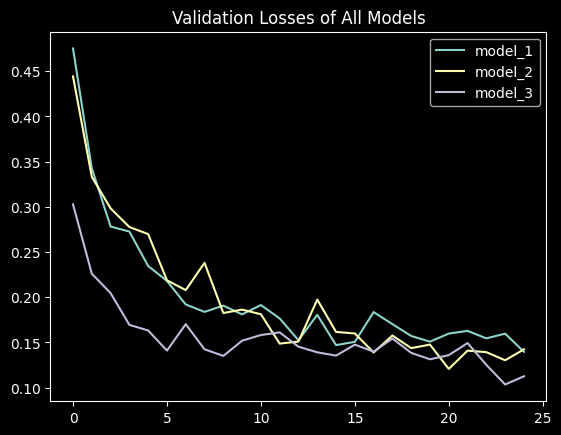

In [ ]:
validation_losses = {
    "model_1": model_1_validation_losses,
    "model_2": model_2_validation_losses,
    "model_3": model_3_validation_losses
}
# plt.plot(model_1_validation_losses)

plt.plot('model_1', data=validation_losses)
plt.plot('model_2', data=validation_losses)
plt.plot('model_3', data=validation_losses)
plt.title("Validation Losses of All Models")
plt.legend(validation_losses.keys())


# Conclusion:
As discussed above, the ECG Heartbeat Categorization project successfully developed and also trained the CNN models for classifying different heartbeat types accurately. Through comprehensive data preprocessing, augmentation, and model training, the model demonstrates the potential of deep learning techniques in medical diagnostics and healthcare applications.  Additionally, research in the future could explore additional data augmentation methods and advanced model architectures to improve classification accuracy and robustness.
